* Comparing among Logistic_regression and SVC_Classifier

LogisticRegressionModel Train Score is :  0.95
LogisticRegressionModel Test Score is :  1.0
LogisticRegressionModel Classes are :  [0 1 2]
LogisticRegressionModel No. of iteratios is :  [100 100 100]
----------------------------------------------------
Predicted Value for LogisticRegressionModel is :  [2 0 1 1 2 0 2 2 2 1]
Prediction Probabilities Value for LogisticRegressionModel is :  [[7.79483191e-04 1.97620698e-01 8.01599819e-01]
 [7.96016144e-01 2.03909970e-01 7.38861354e-05]
 [1.52479760e-01 7.96506018e-01 5.10142224e-02]
 [5.75091112e-02 7.36974496e-01 2.05516393e-01]
 [4.68468584e-04 3.02442615e-01 6.97088916e-01]
 [8.33164654e-01 1.66742809e-01 9.25377223e-05]
 [3.10234712e-05 4.09124295e-01 5.90844682e-01]
 [2.39994612e-04 4.12065105e-01 5.87694900e-01]
 [5.06033661e-04 3.34456248e-01 6.65037718e-01]
 [1.40591596e-02 6.61373776e-01 3.24567065e-01]]
Confusion Matrix is : 
 [[18  0  0]
 [ 0 15  0]
 [ 0  0 17]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


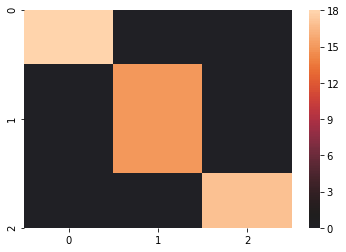

SVCModel Train Score is :  0.96
SVCModel Test Score is :  0.98
----------------------------------------------------
Predicted Value for SVCModel is :  [2 0 1 1 2 0 2 2 2 1]
Confusion Matrix is : 
 [[18  0  0]
 [ 0 15  0]
 [ 0  1 16]]


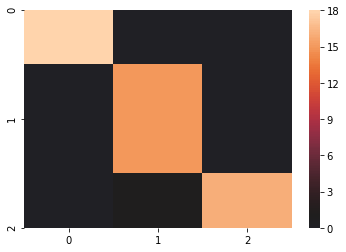

In [2]:
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#----------------------------------------------------

#load iris data

IrisData = load_iris()

#X Data
X = IrisData.data
#print('X Data is \n' , X[:10])
#print('X shape is ' , X.shape)
#print('X Features are \n' , IrisData.feature_names)

#y Data
y = IrisData.target
#print('y Data is \n' , y[:10])
#print('y shape is ' , y.shape)
#print('y Columns are \n' , IrisData.target_names)

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

#----------------------------------------------------
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()


print('====================================================')

#----------------------------------------------------
#Applying SVC Model 

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()